#### Issue with Gauss-Newton

The issue with Gauss-Newton is that the method does not check whether the solution to NLLS through linearization is indeed `close to the point of linearization`. As a result, if the solution is further away, then the linearization itself is invalid in the first place

As a result, regularization will be used to `penalize` such scenario

$$\lambda_1\|A_1x-y_1\|^2+\lambda_2\|A_2x-y_2\|^2+\cdots+\lambda_k\|A_kx-y_k\|^2$$

For which the least squares solution is

$$x_{ls}=\boxed{(\lambda_1A_1^TA_1+\lambda_2A_2^TA_2+\cdots +\lambda_kA_k^TA_k)^{-1}(\lambda_1A_1^Ty_1+\lambda_2A_2^Ty_2+\cdots +\lambda_kA_k^Ty_k)}$$

One of these algorithms is `Levenberg-Marquardt`, which uses one regularization term

#### Levenberg-Marquardt

* `Guess` for $x^{k}$

* `Linearize` $f(x)$ near $x^{k}$
$$f(x)\approx f(x^{k})+Df(x^{k})(x-x^{k})$$
where $Df$ is the Jacobian (`tall` matrix): $Df_{ij}=\frac{\partial f_i}{\partial x_j}$, then write in $\color{orange}{Df(x^{k})}x-\color{red}{y^{k}}$ form
$$\color{orange}{Df(x^{k})}x-\color{red}{\left(Df(x^{k})x^{k}-f(x^{k})\right)}$$

* Rather than minimizing $\|\color{orange}{Df(x^{k})}x-\color{red}{y^{k}}\|^2$ as in Gauss-Newton, `Levenberg-Marquardt` minimizes
$$\|\color{orange}{Df(x^{k})}x-\color{red}{y^{k}}\|^2+\mu\|x-x^{k}\|^2$$
Essentially, the `regularization` term penalizes when the solution $x$ moves further away from $x^{k}$, invalidating the assumption that $x$ is in the vicinity of $x^{k}$


* New guess is `regularized` linear least-squares solution
$$\begin{align*}
x^{k+1}&=\left(\color{orange}{Df(x^{k})}^T \color{orange}{Df(x^{k})}+\mu I\right)^{-1}\left(\color{orange}{Df(x^{k})}^T \color{red}{y^{k}}+\mu x^{k}\right) \\
&=\left(\color{orange}{Df(x^{k})}^T \color{orange}{Df(x^{k})}+\mu I\right)^{-1}\left(\color{orange}{Df(x^{k})}^T \color{red}{\left(Df(x^{k})x^{k}-f(x^{k})\right)}+\mu x^{k}\right) \\
&=\left(\color{orange}{Df(x^{k})}^T \color{orange}{Df(x^{k})}+\mu I\right)^{-1}\left(\color{orange}{Df(x^{k})}^T \color{orange}{Df(x^{k})}x^{k}-\color{orange}{Df(x^{k})}^Tf(x^{k})+\mu x^{k}\right) \\
&=\left(\color{orange}{Df(x^{k})}^T \color{orange}{Df(x^{k})}+\mu I\right)^{-1}\left(\left(\color{orange}{Df(x^{k})}^T \color{orange}{Df(x^{k})}+\mu I \right)x^{k}-\color{orange}{Df(x^{k})}^Tf(x^{k})\right) \\
&=\boxed{x^{k}-\left(\color{orange}{Df(x^{k})}^T \color{orange}{Df(x^{k})}+\mu I\right)^{-1}\color{orange}{Df(x^{k})}^Tf(x^{k})}
\end{align*}$$

* In addition, `Levenberg-Marquardt` will only accept $x^{k+1}$ if it reduces the residual, and the balance term $\mu$ will be adjusted depending on whether $x^{k+1}$ is accepted or not

#### Position estimate from ranges example

Estimate position $x=\begin{bmatrix}x_1 \\x_2\end{bmatrix}\in \mathbf{R}^2$ from approximate distances to beacons at locations $b_1, \cdots, b_m \in \mathbf{R}^2$

* measurement at each beacon is $\rho_i=\|x-b_i\|+v_i$
* NLLS finds $x$ that minimizes

$$\|f(x)\|^2=\sum_{i=1}^m(\rho_i-\|x-b_i\|)^2$$

##### Generate data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

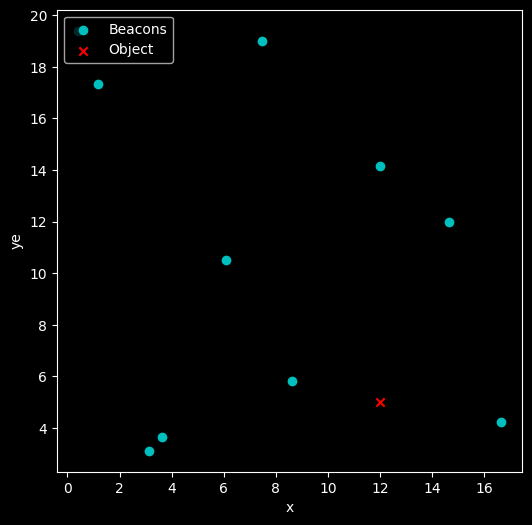

Beacons:
 [[ 7.49e+00  1.90e+01]
 [ 1.46e+01  1.20e+01]
 [ 3.12e+00  3.12e+00]
 [ 1.16e+00  1.73e+01]
 [ 1.20e+01  1.42e+01]
 [ 4.12e-01  1.94e+01]
 [ 1.66e+01  4.25e+00]
 [ 3.64e+00  3.67e+00]
 [ 6.08e+00  1.05e+01]
 [ 8.64e+00  5.82e+00]]

True position:
 [12  5]

Measured distances (rho):
 [ 1.42e+01  7.61e+00  8.62e+00  1.57e+01  9.89e+00  1.84e+01  4.74e+00
  7.76e+00  7.80e+00  3.52e+00]

True distances:
 [ 1.47e+01  7.46e+00  9.08e+00  1.64e+01  9.16e+00  1.85e+01  4.71e+00
  8.47e+00  8.07e+00  3.46e+00]


In [ ]:
np.random.seed(42)

# Beacons
m_beacons = 10
beacon_pos = np.random.rand(m_beacons, 2) * 20

# Object
obj_pos = np.array([12, 5]) # (2,)

# Measured distances with some noise
noise = np.random.normal(0, 0.5, m_beacons)  # (10,)
diff_vec = beacon_pos - obj_pos
rho = np.sqrt(np.sum(diff_vec ** 2, axis=1)) + noise

plt.figure(figsize=(6, 6))
plt.scatter(beacon_pos[:, 0], beacon_pos[:, 1], c='c', label='Beacons')
plt.scatter(obj_pos[0], obj_pos[1], c='r', marker='x', label='Object')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('ye')
# plt.grid(True)
plt.show()

print('Beacons:\n', beacon_pos)
print('\nTrue position:\n', obj_pos)
print('\nMeasured distances (rho):\n', rho)
print('\nTrue distances:\n', np.sqrt(np.sum(diff_vec ** 2, axis=1)))

##### Compute Jacobian

The residual for the `ith` beacon is expressed as

$$\begin{align*}
f_i(x)&=\rho_i-\|x-b_i\| \\
&=\rho_i-\sqrt{(x_1-b_{i1})^2+(x_2-b_{i2})^2} \\
&=\rho_i-\sqrt{d_i}
\end{align*}$$

Now, we can compute the Jacobian

$$\begin{align*}Df_{ij}&=\frac{\partial f_i}{\partial x_j} \\
&=\frac{\partial f_i}{\partial d_i} \frac{\partial d_i}{\partial x_j}\\
&=-\frac{1}{2}\frac{1}{\sqrt{d_i}}\cdot 2(x_j-b_{ij})\\
&=-\frac{x_j-b_{ij}}{\sqrt{d_i}}
\end{align*}$$

In [ ]:
# Compute residual function
def residual(x, beacons, rho):
    diffs = beacons - x # (10, 2)
    # print(diffs.shape)
    return rho - np.sqrt(np.sum(diffs ** 2, axis=1)) # (10,)

# Compute Jacobian of residuals
def jacobian(x, beacons):
    diffs = x - beacons # (10, 2)
    # print(diffs.shape)
    dists = np.sqrt(np.sum(diffs ** 2, axis=1)).reshape(-1, 1) # (10, 1)
    # print(dists.shape)
    return -diffs / dists # (10, 2)

# Test to see whether shapes are correct
x_test = np.array([3., 2.])

residual_test = residual(x_test, beacon_pos, rho)
jacobian_test = jacobian(x_test, beacon_pos)

print('Initial residuals shape:', residual_test.shape)
print('\nInitial residuals:\n', residual_test)
print('\nInitial Jacobian shape:', jacobian_test.shape)
print('\nInitial Jacobian:\n', jacobian_test)

Initial residuals shape: (10,)

Initial residuals:
 [-3.38e+00 -7.71e+00  7.50e+00  2.72e-01 -5.25e+00  7.80e-01 -9.09e+00
  5.97e+00 -1.24e+00 -3.30e+00]

Initial Jacobian shape: (10, 2)

Initial Jacobian:
 [[ 2.55e-01  9.67e-01]
 [ 7.59e-01  6.51e-01]
 [ 1.07e-01  9.94e-01]
 [-1.19e-01  9.93e-01]
 [ 5.96e-01  8.03e-01]
 [-1.47e-01  9.89e-01]
 [ 9.87e-01  1.62e-01]
 [ 3.57e-01  9.34e-01]
 [ 3.41e-01  9.40e-01]
 [ 8.28e-01  5.61e-01]]


##### Iterations

In [ ]:
max_iterations = 10
tolerance = 1e-6
lambda_value = 1e-3
lambda_factor_down = 0.8
lambda_factor_up=1.5

# x_est = np.mean(beacon_pos, axis=0)
x_est = np.array([14, 18])
estimates = [x_est.copy()]

for i in range(max_iterations):
    f = residual(x_est, beacon_pos, rho)
    Df = jacobian(x_est, beacon_pos)

    eigenvalues,_ = np.linalg.eigh(Df.T @ Df)
    print(f"\nIter: {i}, eigenvalues of Df.T @ Df: {eigenvalues}")

    # Levenberg-Marquardt update step
    A = Df.T @ Df + lambda_value * np.eye(2)
    delta_x = np.linalg.inv(A) @ (Df.T @ f)
    new_x_est = x_est - delta_x
    new_residual = residual(new_x_est, beacon_pos, rho)
    print(f"Iter: {i}, new residual: {np.sum(new_residual**2)}")
    print(f"Iter: {i}, old residual: {np.sum(f**2)}")

    # Whether to accept new x
    if np.sum(new_residual**2) < np.sum(f**2):
        print(f"Iter: {i}, new x accepted")
        x_est = new_x_est
        # If new x accepted, then make lambda smaller
        lambda_value *= lambda_factor_down
    else:
        # Otherwise, make it larger
        lambda_value *= lambda_factor_up

    # Append new estimate
    estimates.append(x_est.copy())

    if np.linalg.norm(delta_x) < tolerance:
        print(f'Converged after {i+1} iterations')
        break

# Final estimated position
estimated_position = x_est


Iter: 0, eigenvalues of Df.T @ Df: [ 3.22e+00  6.78e+00]
Iter: 0, new residual: 217.34772724821204
Iter: 0, old residual: 508.0698576930032
Iter: 0, new x accepted

Iter: 1, eigenvalues of Df.T @ Df: [ 2.84e+00  7.16e+00]
Iter: 1, new residual: 59.76599623320328
Iter: 1, old residual: 217.34772724821204
Iter: 1, new x accepted

Iter: 2, eigenvalues of Df.T @ Df: [ 2.53e+00  7.47e+00]
Iter: 2, new residual: 2.0670952795639073
Iter: 2, old residual: 59.76599623320328
Iter: 2, new x accepted

Iter: 3, eigenvalues of Df.T @ Df: [ 3.50e+00  6.50e+00]
Iter: 3, new residual: 1.2917742280324163
Iter: 3, old residual: 2.0670952795639073
Iter: 3, new x accepted

Iter: 4, eigenvalues of Df.T @ Df: [ 3.57e+00  6.43e+00]
Iter: 4, new residual: 1.2916473621477516
Iter: 4, old residual: 1.2917742280324163
Iter: 4, new x accepted

Iter: 5, eigenvalues of Df.T @ Df: [ 3.57e+00  6.43e+00]
Iter: 5, new residual: 1.2916473603801075
Iter: 5, old residual: 1.2916473621477516
Iter: 5, new x accepted

Iter: 

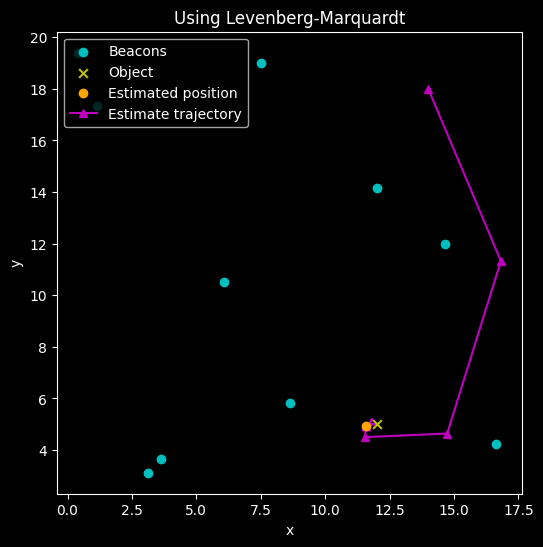

Estimated position: [ 1.16e+01  4.92e+00]
Estimation error: 0.4166318531969591


In [ ]:
estimates_array = np.array(estimates)

plt.figure(figsize=(6, 6))
plt.scatter(beacon_pos[:, 0], beacon_pos[:, 1], c='c', label='Beacons')
plt.scatter(obj_pos[0], obj_pos[1],s=40, c='y', marker='x', label='Object', zorder=5)
plt.scatter(estimated_position[0], estimated_position[1], c='orange', marker='o', label='Estimated position', zorder=5)

# Plot trajectory
plt.plot(estimates_array[:, 0], estimates_array[:, 1], '-^', label='Estimate trajectory', color='m')

plt.annotate('', xy=(estimates_array[-1, 0], estimates_array[-1, 1]),
             xytext=(estimates_array[-2, 0], estimates_array[-2, 1]),
             arrowprops=dict(arrowstyle='->', color='m', lw=2))

plt.legend(loc='upper left')
plt.title('Using Levenberg-Marquardt')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Output final estimated position
print(f'Estimated position: {estimated_position}')
print(f'Estimation error: {np.linalg.norm(estimated_position - obj_pos)}')